In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

%matplotlib inline
from matplotlib.pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
rcParams['figure.figsize'] = 15, 6

In [2]:
df = pd.read_csv('D:/MKCE/ML 1/MonthWiseMarketArrivals_Clean.csv')
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


In [3]:
print('\n Data Types:',df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10227 entries, 0 to 10226
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   market    10227 non-null  object
 1   month     10227 non-null  object
 2   year      10227 non-null  int64 
 3   quantity  10227 non-null  int64 
 4   priceMin  10227 non-null  int64 
 5   priceMax  10227 non-null  int64 
 6   priceMod  10227 non-null  int64 
 7   state     10227 non-null  object
 8   city      10227 non-null  object
 9   date      10227 non-null  object
dtypes: int64(5), object(5)
memory usage: 799.1+ KB

 Data Types: None


In [4]:
df

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012
...,...,...,...,...,...,...,...,...,...,...
10222,YEOLA(MS),December,2011,131326,282,612,526,MS,YEOLA,December-2011
10223,YEOLA(MS),December,2012,207066,485,1327,1136,MS,YEOLA,December-2012
10224,YEOLA(MS),December,2013,215883,472,1427,1177,MS,YEOLA,December-2013
10225,YEOLA(MS),December,2014,201077,446,1654,1456,MS,YEOLA,December-2014


In [5]:
df.shape

(10227, 10)

In [6]:
#indexing using date

df['date']=pd.to_datetime(df['date'],infer_datetime_format=True)
df.set_index(['date'],inplace=True)

In [7]:
df

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city
date,,,,,,,,,
2005-01-01,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR
2006-01-01,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR
2010-01-01,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR
2011-01-01,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR
2012-01-01,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR
...,...,...,...,...,...,...,...,...,...
2011-12-01,YEOLA(MS),December,2011,131326,282,612,526,MS,YEOLA
2012-12-01,YEOLA(MS),December,2012,207066,485,1327,1136,MS,YEOLA
2013-12-01,YEOLA(MS),December,2013,215883,472,1427,1177,MS,YEOLA


In [8]:
    df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city
date,,,,,,,,,
2005-01-01,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR
2006-01-01,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR
2010-01-01,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR
2011-01-01,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR
2012-01-01,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR


In [9]:
#scrutinizing

df1= df[(df.city == 'MUMBAI')]

In [10]:
df1.shape

(146, 9)

In [11]:
df1.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city
date,,,,,,,,,
2004-01-01,MUMBAI,January,2004,267100,719,971,849,MS,MUMBAI
2005-01-01,MUMBAI,January,2005,275845,261,513,387,MS,MUMBAI
2006-01-01,MUMBAI,January,2006,228000,315,488,402,MS,MUMBAI
2007-01-01,MUMBAI,January,2007,205200,866,1136,997,MS,MUMBAI
2008-01-01,MUMBAI,January,2008,267550,348,550,448,MS,MUMBAI


In [12]:
df1

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city
date,,,,,,,,,
2004-01-01,MUMBAI,January,2004,267100,719,971,849,MS,MUMBAI
2005-01-01,MUMBAI,January,2005,275845,261,513,387,MS,MUMBAI
2006-01-01,MUMBAI,January,2006,228000,315,488,402,MS,MUMBAI
2007-01-01,MUMBAI,January,2007,205200,866,1136,997,MS,MUMBAI
2008-01-01,MUMBAI,January,2008,267550,348,550,448,MS,MUMBAI
...,...,...,...,...,...,...,...,...,...
2011-12-01,MUMBAI,December,2011,290350,519,994,749,MS,MUMBAI
2012-12-01,MUMBAI,December,2012,218500,1048,1609,1330,MS,MUMBAI
2013-12-01,MUMBAI,December,2013,226385,1298,1976,1639,MS,MUMBAI


In [13]:
df1.drop(df1[['month','year','state','city']],axis=1,inplace=True)

c:\python39\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [14]:
df1.head()

,market,quantity,priceMin,priceMax,priceMod
date,,,,,
2004-01-01,MUMBAI,267100,719,971,849
2005-01-01,MUMBAI,275845,261,513,387
2006-01-01,MUMBAI,228000,315,488,402
2007-01-01,MUMBAI,205200,866,1136,997
2008-01-01,MUMBAI,267550,348,550,448


In [15]:
df1

,market,quantity,priceMin,priceMax,priceMod
date,,,,,
2004-01-01,MUMBAI,267100,719,971,849
2005-01-01,MUMBAI,275845,261,513,387
2006-01-01,MUMBAI,228000,315,488,402
2007-01-01,MUMBAI,205200,866,1136,997
2008-01-01,MUMBAI,267550,348,550,448
...,...,...,...,...,...
2011-12-01,MUMBAI,290350,519,994,749
2012-12-01,MUMBAI,218500,1048,1609,1330
2013-12-01,MUMBAI,226385,1298,1976,1639


In [16]:
df1.drop(df1[['market','quantity','priceMin','priceMax']],axis=1,inplace=True)

c:\python39\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [17]:
df1

,priceMod
date,
2004-01-01,849
2005-01-01,387
2006-01-01,402
2007-01-01,997
2008-01-01,448
...,...
2011-12-01,749
2012-12-01,1330
2013-12-01,1639


In [18]:
df1.duplicated().sum()

6

In [19]:
df1.drop_duplicates(subset=None, inplace=True)

c:\python39\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [20]:
df1.duplicated().sum()

0

In [21]:
df1

,priceMod
date,
2004-01-01,849
2005-01-01,387
2006-01-01,402
2007-01-01,997
2008-01-01,448
...,...
2011-12-01,749
2012-12-01,1330
2013-12-01,1639


In [22]:
df1.shape

(140, 1)

In [23]:
ts=df1['priceMod']

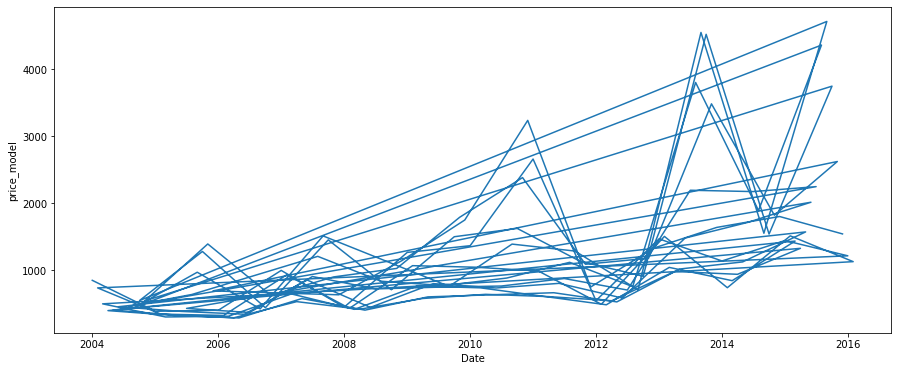

In [24]:
plt.xlabel("Date")
plt.ylabel("price_model")

plt.plot(ts)

In [25]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12,center=False).mean() 
    rolstd = timeseries.rolling(window=12,center=False).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

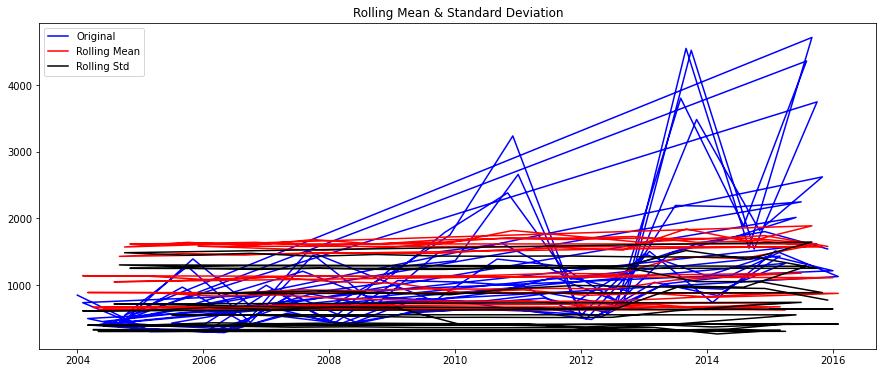

Results of Dickey-Fuller Test:
Test Statistic                  -0.330216
p-value                          0.921114
#Lags Used                      11.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [26]:
test_stationarity(df1['priceMod'])

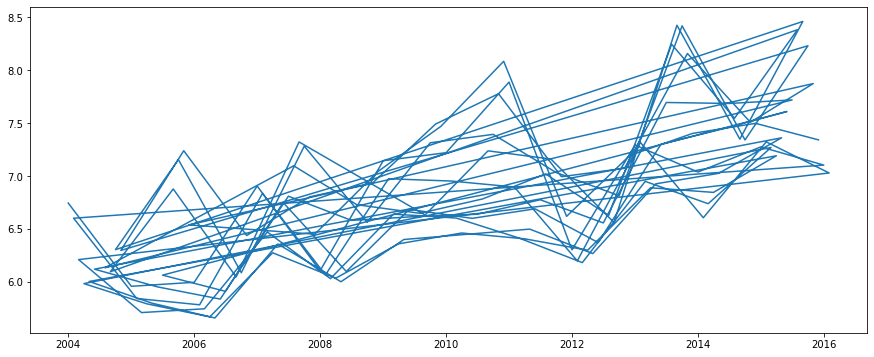

In [29]:
#transformation
ts_log = np.log(ts)

plt.plot(ts_log)

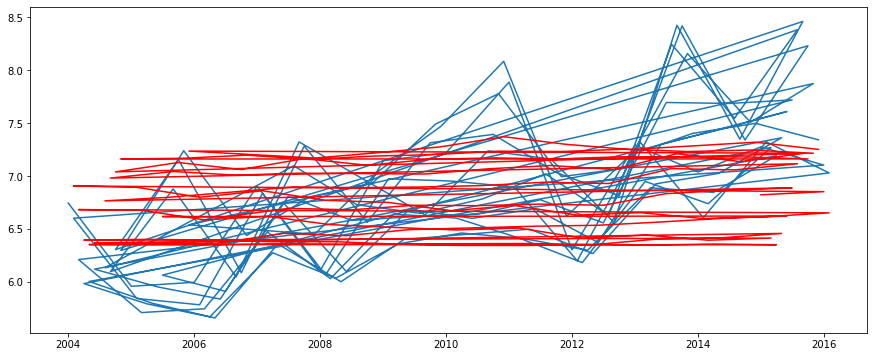

In [30]:
movingAverage = ts_log.rolling(window=12).mean()
movingSTD = ts_log.rolling(window=12).std()
plt.plot(ts_log)
plt.plot(movingAverage, color='red')

In [31]:
# Get the difference between the moving average and the actual number of passengers
ts_log_mv_diff = ts_log - movingAverage
ts_log_mv_diff.head(12)
#Remove Nan Values
ts_log_mv_diff.dropna(inplace=True)
ts_log_mv_diff.head(10)

date
2015-01-01    0.452513
2016-01-01    0.250662
2004-02-01   -0.304174
2005-02-01   -1.049117
2006-02-01   -1.015426
2007-02-01   -0.024933
2008-02-01   -0.704217
2009-02-01    0.223726
2010-02-01    0.279815
2011-02-01    0.174303
Name: priceMod, dtype: float64

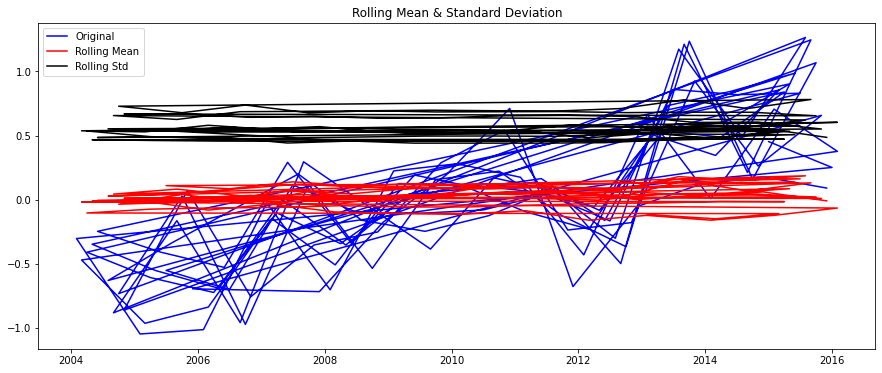

Results of Dickey-Fuller Test:
Test Statistic                  -2.790288
p-value                          0.059675
#Lags Used                      12.000000
Number of Observations Used    116.000000
Critical Value (1%)             -3.488022
Critical Value (5%)             -2.886797
Critical Value (10%)            -2.580241
dtype: float64


In [32]:
test_stationarity(ts_log_mv_diff)

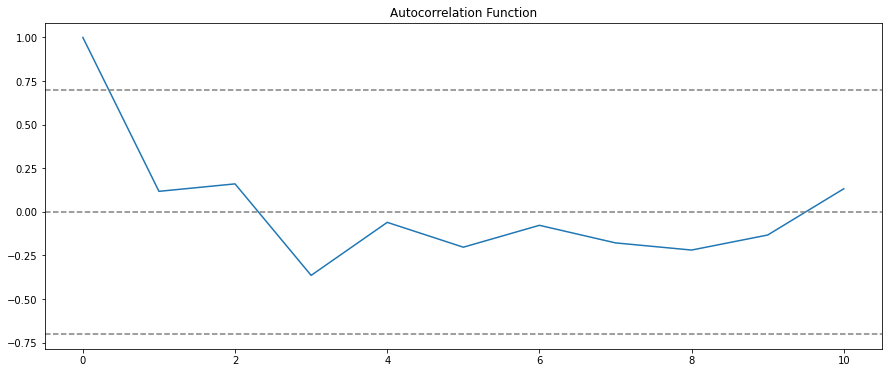

In [33]:
#autocorrelation

plt.plot(np.arange(0,11), acf(ts_log_mv_diff, nlags = 10))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-7.96/np.sqrt(len(ts_log_mv_diff)),linestyle='--',color='gray')
plt.axhline(y=7.96/np.sqrt(len(ts_log_mv_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.show()

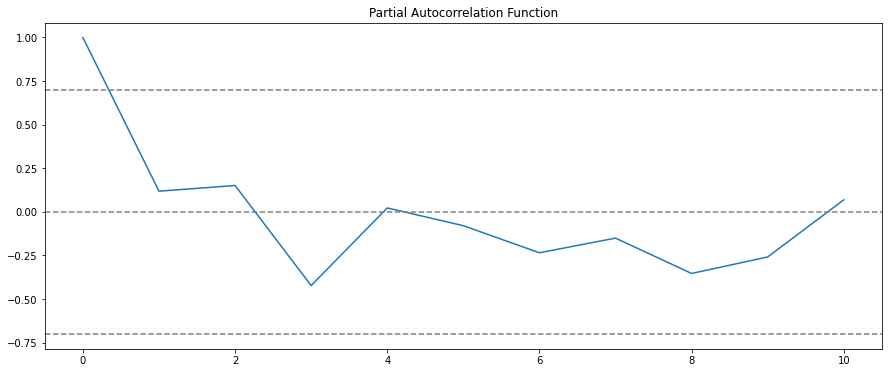

In [34]:
#Partial autocorrelation

plt.plot(np.arange(0,11), pacf(ts_log_mv_diff, nlags = 10))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-7.96/np.sqrt(len(ts_log_mv_diff)),linestyle='--',color='gray')
plt.axhline(y=7.96/np.sqrt(len(ts_log_mv_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.show()

In [35]:
model = ARIMA(ts_log, order=(1, 1, 0))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_mv_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues[1:] - ts_log_mv_diff)**2))

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.
